In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep = "\t", names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
movie_titles = pd.read_csv('Movie_Id_Titles.csv')

In [4]:
movie_titles.head(5)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99341 entries, 0 to 99340
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    99341 non-null  int64 
 1   item_id    99341 non-null  int64 
 2   rating     99341 non-null  int64 
 3   timestamp  99341 non-null  int64 
 4   title      99341 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.5+ MB


#EDA

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Prefontaine (1997)                5.0
Star Kid (1997)                   5.0
They Made Me a Criminal (1939)    5.0
Aiqing wansui (1994)              5.0
Great Day in Harlem, A (1994)     5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             578
Contact (1997)               506
Fargo (1996)                 504
Return of the Jedi (1983)    503
Liar Liar (1997)             480
Name: rating, dtype: int64

In [11]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.916667
12 Angry Men (1957),4.344000
187 (1997),3.025000
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [22]:
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.916667,108
12 Angry Men (1957),4.344000,125
187 (1997),3.025000,40
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<AxesSubplot:>

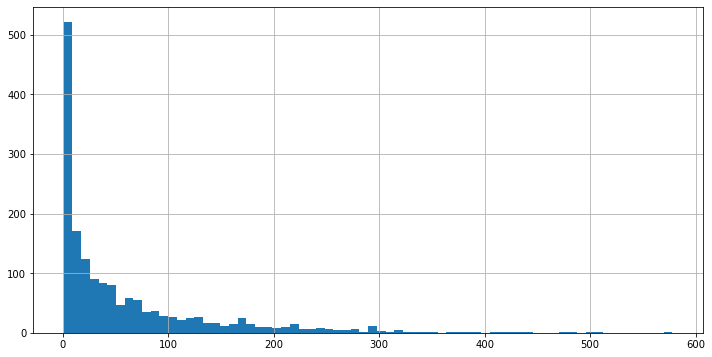

In [24]:
plt.figure(figsize = (12,6))
ratings['num_of_ratings'].hist(bins = 70)

<AxesSubplot:>

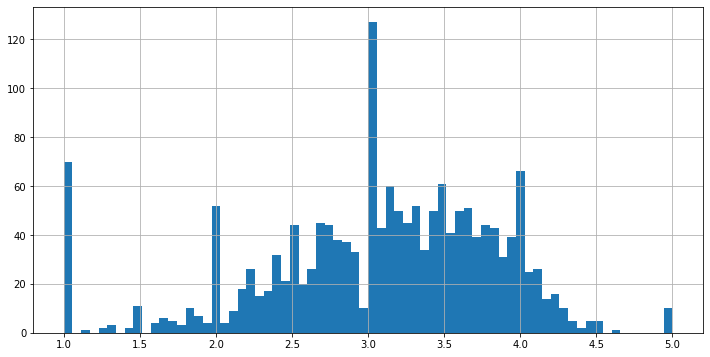

In [25]:
plt.figure(figsize = (12,6))
ratings['rating'].hist(bins = 70)


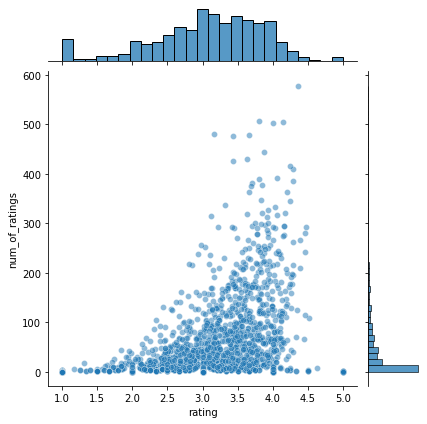

In [26]:
sns.jointplot(x = 'rating', y = 'num_of_ratings', data = ratings, alpha = 0.5)

In [27]:
# AMAC MATRIX OLUSTURMAK
movie_matrix = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.916667,108
12 Angry Men (1957),4.344000,125
187 (1997),3.025000,40


In [29]:
ratings.sort_values('num_of_ratings',ascending = False).head()

,rating,num_of_ratings
title,,
Star Wars (1977),4.356401,578
Contact (1997),3.804348,506
Fargo (1996),4.152778,504
Return of the Jedi (1983),4.003976,503
Liar Liar (1997),3.160417,480


In [30]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']
liarliar_user_ratings = movie_matrix['Liar Liar (1997)']
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [31]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)
similar_to_liarliar = movie_matrix.corrwith(liarliar_user_ratings)

/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [34]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.218512
12 Angry Men (1957)                      0.183152
187 (1997)                               0.026519
                                           ...   
Young Guns II (1990)                     0.225305
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.765532
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [35]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])
corr_starwars.dropna(inplace = True)
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.218512
12 Angry Men (1957),0.183152
187 (1997),0.026519
...,...
Young Guns (1988),0.186088
Young Guns II (1990),0.225305
"Young Poisoner's Handbook, The (1995)",-0.007374


In [37]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Boys Life (1995),1.0
Commandments (1997),1.0
Hollow Reed (1996),1.0
Cosi (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
No Escape (1994),1.0
Ed's Next Move (1996),1.0
"Good Man in Africa, A (1994)",1.0


In [38]:
corr_starwars = corr_starwars.join(ratings['num_of_ratings'])
corr_starwars.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.218512,108
12 Angry Men (1957),0.183152,125
187 (1997),0.026519,40


In [40]:
corr_starwars[corr_starwars['num_of_ratings']>100].sort_values('Correlation',ascending = False).head()

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,578
"Empire Strikes Back, The (1980)",0.749099,364
Return of the Jedi (1983),0.674181,503
Raiders of the Lost Ark (1981),0.535474,416
Austin Powers: International Man of Mystery (1997),0.377433,130


In [45]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns = ['Correlation'])
corr_liarliar.dropna(inplace = True)
corr_liarliar = corr_liarliar.join(ratings['num_of_ratings'])
corr_liarliar[corr_liarliar['num_of_ratings']>100].sort_values('Correlation',ascending = False).head()

,Correlation,num_of_ratings
title,,
Liar Liar (1997),1.000000,480
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.479035,129
Waterworld (1995),0.472486,102
Pretty Woman (1990),0.469152,163
